In [ ]:
#Most of this code was provided to us by our professor Dr.Emma Towlsown.


In [1]:
# Importing the required libraries

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

In [5]:
#Parameters for random network
nodes = 4096
edges = 20451
p = 2 * edges / (nodes * (nodes - 1))
G = nx.erdos_renyi_graph(nodes, p) 
print("P =", p)

P = 0.0024385445283882784


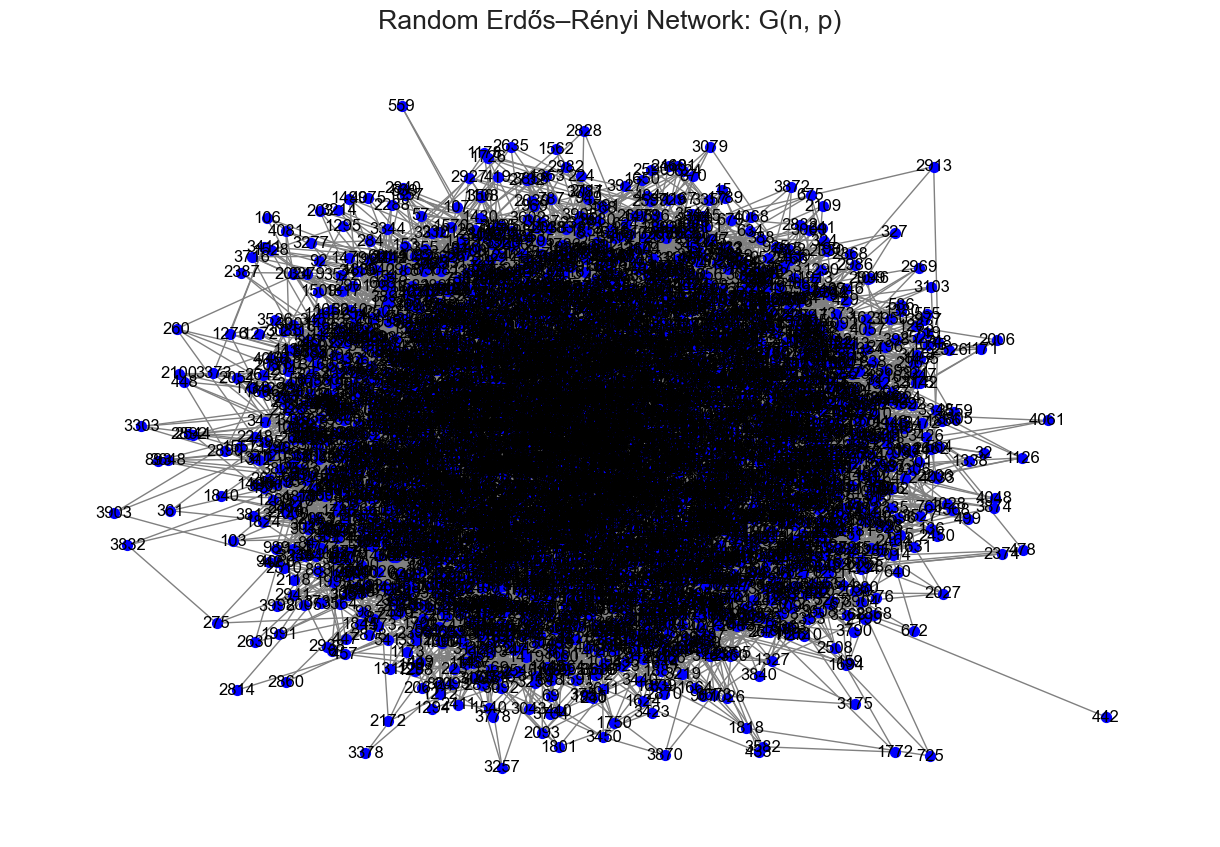

In [7]:
#Visualization

plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=50, node_color='blue', edge_color='gray')
plt.title('Random Erdős–Rényi Network: G(n, p)')
plt.show()

In [7]:
# Initialize lists to store metrics of interest
average_path_lengths = []
clustering_coefficients = []
path_lengths =[]
#Do not run this code as 1000 ER networks will take over 15 hours to run
# Generate 1000 Erdős–Rényi random graphs and calculate metrics
for _ in range(1000):
    G = nx.erdos_renyi_graph(nodes, p)
    
    clustering_coefficients.append(nx.average_clustering(G))
    # Ensure the graph is connected to calculate the average path length
    if nx.is_connected(G):
        average_path_length = nx.average_shortest_path_length(G)
        average_path_lengths.append(average_path_length)
        path_lengths.append(nx.average_shortest_path_length(G))
    else:
        # Handling disconnected graphs: One approach is to skip them
        # Alternatively, consider only the largest connected component
        largest_cc = max(nx.connected_components(G), key=len)
        subgraph = G.subgraph(largest_cc)
        path_lengths.append(nx.average_shortest_path_length(subgraph))
    
    clustering_coefficient = nx.average_clustering(G)
    clustering_coefficients.append(clustering_coefficient)




In [10]:
# Now you have the metrics for 1000 random graphs
# You can compare these metrics with those of your original graph
# For example, calculate the mean and standard deviation
mean_path_length = np.mean(average_path_lengths)
std_path_length = np.std(average_path_lengths)

mean_clustering_coefficient = np.mean(clustering_coefficients)
std_clustering_coefficient = np.std(clustering_coefficients)

print(f"Average Path Length: Mean = {mean_path_length}, Std = {std_path_length}")
print(f"Clustering Coefficient: Mean = {mean_clustering_coefficient}, Std = {std_clustering_coefficient}")

Average Path Length: Mean = 3.8633847318975674, Std = 0.011270431958997311
Clustering Coefficient: Mean = 0.0024116817672570597, Std = 0.00026047830225338803
